In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.head()

C:\Users\Klucly\AppData\Local\Temp\ipykernel_37644\2117274049.py:1: DtypeWarning: Columns (24,25,27,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


,transaction_id,is_fraud,created_at,is_subscription,transaction_type,currency_amount,currency_id,amount_scaled,merchant_customer_id,merchant_customer_email,...,device,card_id,bank,cardbrand,cardcountry,cardtype,bin,card_exp_relative,card_holder_first_name,card_holder_last_name
0,2023059597300930765,0,2024-01-22 12:17:03.253682787,False,first,1348.65,2,8,NaN,db30f9b09fc6db70bd69492bad0993610e034dd0aaf196...,...,NaN,55b9df24b0ee3d556bd9d92e3e96cd9cd2020aa889a099...,Intl Hdqtrs-Center Owned,VISA,IND,DEBIT,82178912e9cb7cdfe4397e288172d2ddb5b4ca24de4ad7...,59.0,NaN,NaN
1,1582863622564573009,0,2024-01-28 06:29:27.253682787,True,first,201.15,4,98,6b5907bb6b2a4db1e1d8e29ecda26c958148c869ae21e8...,4429eb1d2902632d67042cd8b04855c12499684b25fe40...,...,NaN,37ebdd04d53f8bbda6cdc8a67a63a3f07178697cc4b81b...,National Australia Bank Limited,VISA,AUS,CREDIT,c84a4f90930cf35cb2718e49919df4f2400347c3e28e5c...,46.0,NaN,NaN
2,15650942020679503118,0,2024-01-24 08:14:17.253682787,True,first,201.15,4,99,6f512fcdad63bdcac2fb2283d54e19cfb37b3714d38786...,af46d0225af51b3083c33d1f31e380e07cfa6d7256f30d...,...,NaN,2a7e39132540646a182b136943d02522d6990e9fdedf09...,National Australia Bank Limited,VISA,AUS,DEBIT,a321caacb48f0dd4ac473a76fb7a8eaa54f0c88d409594...,41.0,NaN,NaN
3,8147581512265419576,0,2024-01-28 06:31:26.253682787,True,first,1078.65,4,526,2ae2b02e168b5614f46a2b94715562012cf01f405b4da2...,53514d7fdcf50004badc5914c5faaad5311e94b9596c90...,...,NaN,1137f5c95cbd1e9c6513b475f0cc4ebf1df27afa23a6b3...,Suncorp-Metway Limited,VISA,AUS,DEBIT,6e23dbda72e8f0b5236187e648159b5cca78fb829b56f7...,43.0,NaN,NaN
4,4959538505037167822,0,2024-01-28 07:52:21.253682787,True,first,201.15,4,98,864d0403fc982633f1c59ec6c7bc135a4332c05b96be46...,4c5c0212b292b788c8d1eadba5fa3e4ebd5b9f8b99ebde...,...,NaN,8e003dae05dbbdda3fd51a0b266f4bd8254dbbd539143a...,National Australia Bank Limited,VISA,AUS,DEBIT,63428e9b0a8e0a80b98f02428261e1e24048201f3a74bb...,67.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36387900 entries, 0 to 36387899
Data columns (total 43 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   transaction_id                uint64 
 1   is_fraud                      int64  
 2   created_at                    object 
 3   is_subscription               bool   
 4   transaction_type              object 
 5   currency_amount               float64
 6   currency_id                   int64  
 7   amount_scaled                 int64  
 8   merchant_customer_id          object 
 9   merchant_customer_email       object 
 10  merchant_customer_phone       object 
 11  merchant_customer_first_name  object 
 12  merchant_customer_last_name   object 
 13  merchant_country              object 
 14  merchant_city                 object 
 15  merchant_language             object 
 16  ip_address                    object 
 17  platform                      object 
 18  merchant_id         

In [4]:
df.head(3)

,transaction_id,is_fraud,created_at,is_subscription,transaction_type,currency_amount,currency_id,amount_scaled,merchant_customer_id,merchant_customer_email,...,device,card_id,bank,cardbrand,cardcountry,cardtype,bin,card_exp_relative,card_holder_first_name,card_holder_last_name
0,2023059597300930765,0,2024-01-22 12:17:03.253682787,False,first,1348.65,2,8,NaN,db30f9b09fc6db70bd69492bad0993610e034dd0aaf196...,...,NaN,55b9df24b0ee3d556bd9d92e3e96cd9cd2020aa889a099...,Intl Hdqtrs-Center Owned,VISA,IND,DEBIT,82178912e9cb7cdfe4397e288172d2ddb5b4ca24de4ad7...,59.0,NaN,NaN
1,1582863622564573009,0,2024-01-28 06:29:27.253682787,True,first,201.15,4,98,6b5907bb6b2a4db1e1d8e29ecda26c958148c869ae21e8...,4429eb1d2902632d67042cd8b04855c12499684b25fe40...,...,NaN,37ebdd04d53f8bbda6cdc8a67a63a3f07178697cc4b81b...,National Australia Bank Limited,VISA,AUS,CREDIT,c84a4f90930cf35cb2718e49919df4f2400347c3e28e5c...,46.0,NaN,NaN
2,15650942020679503118,0,2024-01-24 08:14:17.253682787,True,first,201.15,4,99,6f512fcdad63bdcac2fb2283d54e19cfb37b3714d38786...,af46d0225af51b3083c33d1f31e380e07cfa6d7256f30d...,...,NaN,2a7e39132540646a182b136943d02522d6990e9fdedf09...,National Australia Bank Limited,VISA,AUS,DEBIT,a321caacb48f0dd4ac473a76fb7a8eaa54f0c88d409594...,41.0,NaN,NaN


## Preprocessing blank

In [5]:
df.isnull().sum()

transaction_id                         0
is_fraud                               0
created_at                             0
is_subscription                        0
transaction_type                       0
currency_amount                        0
currency_id                            0
amount_scaled                          0
merchant_customer_id             5283914
merchant_customer_email               10
merchant_customer_phone         35150355
merchant_customer_first_name    31914541
merchant_customer_last_name     33244135
merchant_country                       2
merchant_city                   35358214
merchant_language                8420113
ip_address                             2
platform                               0
merchant_id                            0
merchant_shop_id                       0
merchant_shop_name                     0
is_secured                             0
order_number                    34814741
ip_country                        139510
is_verified     

In [6]:
missing_features_percentage = (df.isnull().sum()/len(df))*100
missing_features_percentage

transaction_id                    0.000000
is_fraud                          0.000000
created_at                        0.000000
is_subscription                   0.000000
transaction_type                  0.000000
currency_amount                   0.000000
currency_id                       0.000000
amount_scaled                     0.000000
merchant_customer_id             14.521074
merchant_customer_email           0.000027
merchant_customer_phone          96.599021
merchant_customer_first_name     87.706466
merchant_customer_last_name      91.360411
merchant_country                  0.000005
merchant_city                    97.170252
merchant_language                23.139871
ip_address                        0.000005
platform                          0.000000
merchant_id                       0.000000
merchant_shop_id                  0.000000
merchant_shop_name                0.000000
is_secured                        0.000000
order_number                     95.676697
ip_country 

In [30]:
df_cleaned = df.dropna(axis=1, thresh=0.22*len(df))

In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36387900 entries, 0 to 36387899
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   transaction_id           uint64 
 1   is_fraud                 int64  
 2   created_at               object 
 3   is_subscription          bool   
 4   transaction_type         object 
 5   currency_amount          float64
 6   currency_id              int64  
 7   amount_scaled            int64  
 8   merchant_customer_id     object 
 9   merchant_customer_email  object 
 10  merchant_country         object 
 11  merchant_language        object 
 12  ip_address               object 
 13  platform                 object 
 14  merchant_id              uint64 
 15  merchant_shop_id         int64  
 16  merchant_shop_name       object 
 17  is_secured               bool   
 18  ip_country               object 
 19  payment_type             object 
 20  traffic_source           object 
 21  user_a

In [31]:
df_cleaned.isnull().sum()

transaction_id                    0
is_fraud                          0
created_at                        0
is_subscription                   0
transaction_type                  0
currency_amount                   0
currency_id                       0
amount_scaled                     0
merchant_customer_id        5283914
merchant_customer_email          10
merchant_country                  2
merchant_language           8420113
ip_address                        2
platform                          0
merchant_id                       0
merchant_shop_id                  0
merchant_shop_name                0
is_secured                        0
ip_country                   139510
payment_type               14523988
traffic_source             27515960
user_agent                 25042052
card_id                        1051
bank                        1121650
cardbrand                     12612
cardcountry                  162362
cardtype                     851681
bin                         

In [26]:
missing_features_percentage = (df_cleaned.isnull().sum()/len(df))*100
missing_features_percentage

transaction_id              0.000000
is_fraud                    0.000000
created_at                  0.000000
is_subscription             0.000000
transaction_type            0.000000
currency_amount             0.000000
currency_id                 0.000000
amount_scaled               0.000000
merchant_customer_id       14.521074
merchant_customer_email     0.000027
merchant_country            0.000005
merchant_language          23.139871
ip_address                  0.000005
platform                    0.000000
merchant_id                 0.000000
merchant_shop_id            0.000000
merchant_shop_name          0.000000
is_secured                  0.000000
ip_country                  0.383397
payment_type               39.914334
traffic_source             75.618434
user_agent                 68.819723
card_id                     0.002888
bank                        3.082481
cardbrand                   0.034660
cardcountry                 0.446198
cardtype                    2.340561
b

In [32]:
df_cleaned = df_cleaned.drop(columns=["user_agent", "traffic_source", "card_holder_first_name", "card_holder_last_name"])

In [33]:
df_cleaned.isnull().sum()

transaction_id                    0
is_fraud                          0
created_at                        0
is_subscription                   0
transaction_type                  0
currency_amount                   0
currency_id                       0
amount_scaled                     0
merchant_customer_id        5283914
merchant_customer_email          10
merchant_country                  2
merchant_language           8420113
ip_address                        2
platform                          0
merchant_id                       0
merchant_shop_id                  0
merchant_shop_name                0
is_secured                        0
ip_country                   139510
payment_type               14523988
card_id                        1051
bank                        1121650
cardbrand                     12612
cardcountry                  162362
cardtype                     851681
bin                             976
card_exp_relative               976
dtype: int64

In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36387900 entries, 0 to 36387899
Data columns (total 27 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   transaction_id           uint64 
 1   is_fraud                 int64  
 2   created_at               object 
 3   is_subscription          bool   
 4   transaction_type         object 
 5   currency_amount          float64
 6   currency_id              int64  
 7   amount_scaled            int64  
 8   merchant_customer_id     object 
 9   merchant_customer_email  object 
 10  merchant_country         object 
 11  merchant_language        object 
 12  ip_address               object 
 13  platform                 object 
 14  merchant_id              uint64 
 15  merchant_shop_id         int64  
 16  merchant_shop_name       object 
 17  is_secured               bool   
 18  ip_country               object 
 19  payment_type             object 
 20  card_id                  object 
 21  bank  

In [39]:
corr = df_cleaned.corr(numeric_only=True)["is_fraud"].sort_values(ascending=True)

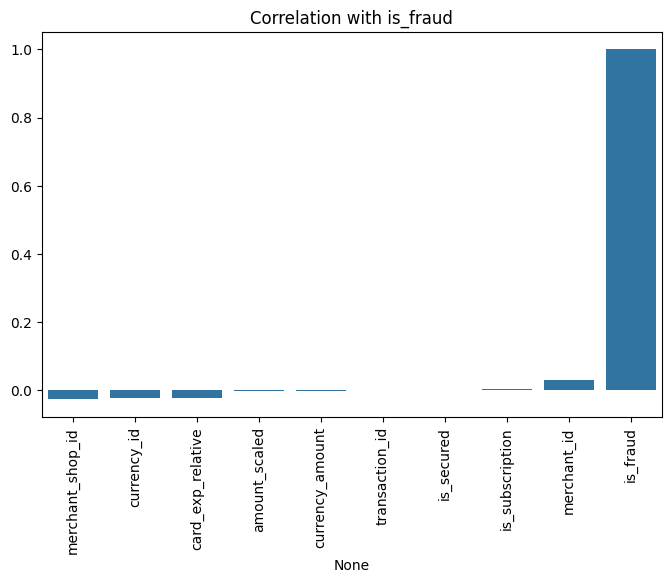

In [44]:
plt.figure(figsize=(8, 5))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.title("Correlation with is_fraud")
plt.show()

In [48]:
categorical_features = df_cleaned.select_dtypes(include=["object"]).columns
df_cleaned[categorical_features] = df_cleaned[categorical_features].fillna("#")

numerical_features = df_cleaned.select_dtypes(include=["int64", "uint64", "float64"]).columns
df_cleaned = df_cleaned.dropna(subset=numerical_features)

In [49]:
df_cleaned.isnull().sum().sum()

np.int64(0)

In [51]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36386924 entries, 0 to 36387899
Data columns (total 27 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   transaction_id           uint64 
 1   is_fraud                 int64  
 2   created_at               object 
 3   is_subscription          bool   
 4   transaction_type         object 
 5   currency_amount          float64
 6   currency_id              int64  
 7   amount_scaled            int64  
 8   merchant_customer_id     object 
 9   merchant_customer_email  object 
 10  merchant_country         object 
 11  merchant_language        object 
 12  ip_address               object 
 13  platform                 object 
 14  merchant_id              uint64 
 15  merchant_shop_id         int64  
 16  merchant_shop_name       object 
 17  is_secured               bool   
 18  ip_country               object 
 19  payment_type             object 
 20  card_id                  object 
 21  bank       

##  Form sample using stratification

In [59]:
lst_of_features = list(df_cleaned.columns)
lst_of_features

['transaction_id',
 'is_fraud',
 'created_at',
 'is_subscription',
 'transaction_type',
 'currency_amount',
 'currency_id',
 'amount_scaled',
 'merchant_customer_id',
 'merchant_customer_email',
 'merchant_country',
 'merchant_language',
 'ip_address',
 'platform',
 'merchant_id',
 'merchant_shop_id',
 'merchant_shop_name',
 'is_secured',
 'ip_country',
 'payment_type',
 'card_id',
 'bank',
 'cardbrand',
 'cardcountry',
 'cardtype',
 'bin',
 'card_exp_relative']

In [ ]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop("is_fraud", axis=1)
y = df_cleaned["is_fraud"]

df_sample, _ = train_test_split(df_cleaned, train_size=500_000, stratify=df_cleaned[lst_of_features], random_state=42)